# Decision Tree Algorithm

In [2]:
# Paso 1. Lectura de datos

import pandas as pd

all_data = pd.read_csv("../data/diabetes.csv")
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
all_data = all_data.drop_duplicates().reset_index(drop=True) # En esta línea se eliminan los duplicados 
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = all_data.drop("Outcome", axis = 1)
y = all_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [5]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [6]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/diabetes_train.csv", index = False)
X_test_sel.to_csv("../data/processed/diabetes_test.csv", index = False)

In [7]:
diabetes_train_data = pd.read_csv("../data/processed/diabetes_train.csv")
diabetes_test_data = pd.read_csv("../data/processed/diabetes_test.csv")

diabetes_train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


### EDA

In [30]:
diabetes_train_data.shape

(614, 8)

In [31]:
diabetes_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    float64
 1   Glucose                   614 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   Insulin                   614 non-null    float64
 4   BMI                       614 non-null    float64
 5   DiabetesPedigreeFunction  614 non-null    float64
 6   Age                       614 non-null    float64
 7   Outcome                   614 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 38.5 KB


In [32]:
diabetes_train_data.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.742671,120.855049,69.415309,81.438111,31.983388,0.469168,32.907166,0.346906
std,3.313264,32.035057,18.512599,116.234835,7.740625,0.336847,11.503437,0.476373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,27.100000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,42.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,129.750000,36.375000,0.613750,40.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
diabetes_train_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outliers

/tmp/ipykernel_565/2327573211.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Insulin", y="BMI", data=diabetes_train_data, palette='viridis')
/home/vscode/.local/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 91.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vscode/.local/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/vs

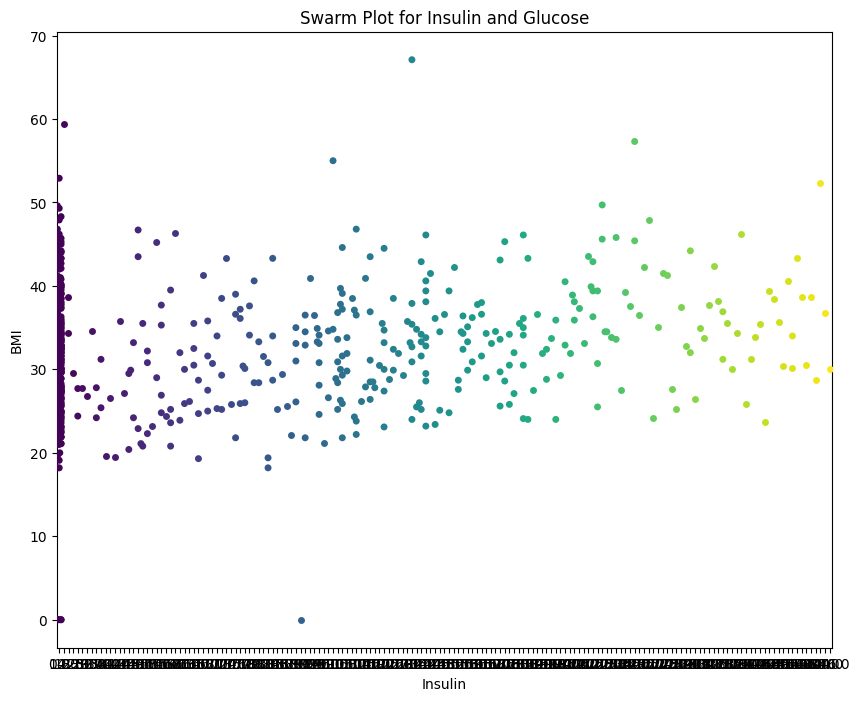

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.swarmplot(x="Insulin", y="BMI", data=diabetes_train_data, palette='viridis')

plt.title('Swarm Plot for Insulin and Glucose')
plt.xlabel('Insulin')
plt.ylabel('BMI')
plt.show()

### Violin plots
Se utilizaron los violin plots para visualizar el tipo de relación entre diferentes variables, aunque en este caso
solo es por mera exploración, pues intervienen más de dos variables.

/tmp/ipykernel_565/1476515019.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="BloodPressure", y="Glucose", data=diabetes_train_data, palette='viridis', alpha=0.7, linewidth=1)


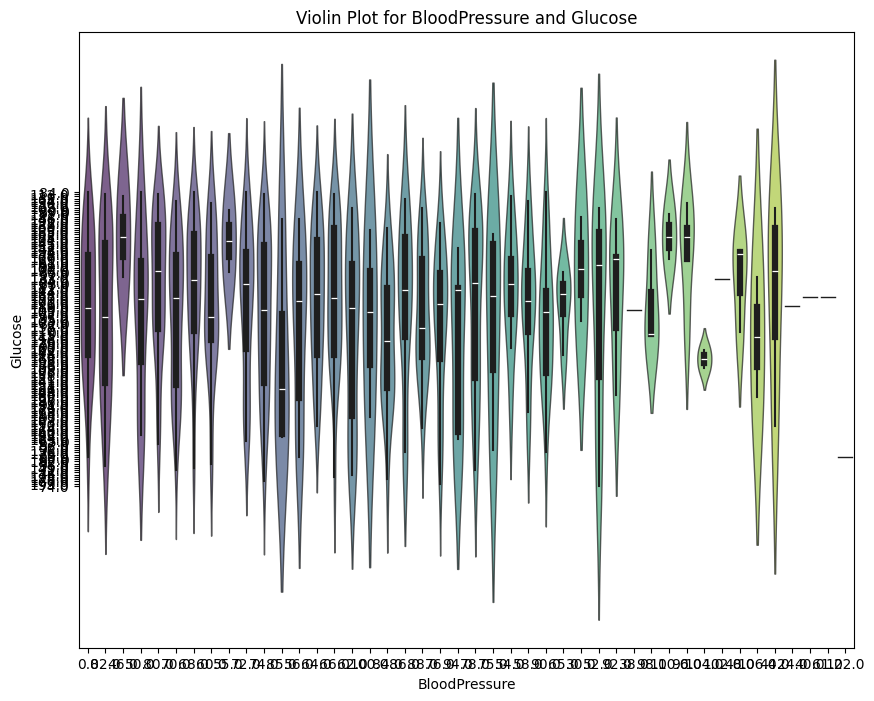

In [57]:
diabetes_train_data['BloodPressure'] = diabetes_train_data['BloodPressure'].astype(str)  

plt.figure(figsize=(10, 8))

sns.violinplot(x="BloodPressure", y="Glucose", data=diabetes_train_data, palette='viridis', alpha=0.7, linewidth=1)

plt.title('Violin Plot for BloodPressure and Glucose')
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.show()

Se realiza una visualización más para las variables "Insulin" y "Glucose"

/tmp/ipykernel_565/3265354735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Insulin", y="BMI", data=diabetes_train_data, palette='viridis', alpha=0.7, linewidth=1)


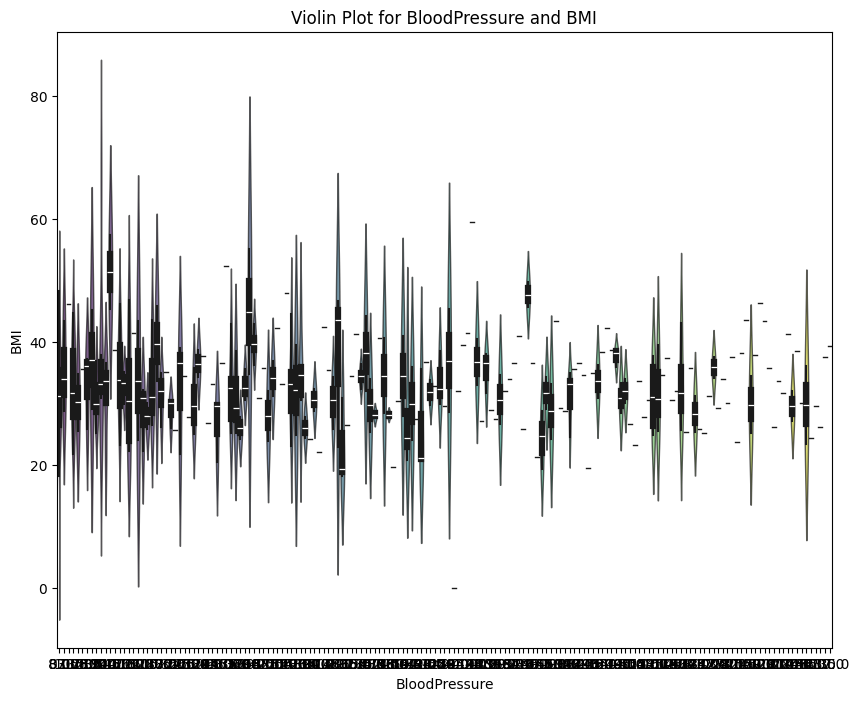

In [55]:
diabetes_train_data['Insulin'] = diabetes_train_data['Insulin'].astype(str)  

plt.figure(figsize=(10, 8))

sns.violinplot(x="Insulin", y="BMI", data=diabetes_train_data, palette='viridis', alpha=0.7, linewidth=1)

plt.title('Violin Plot for BloodPressure and BMI')
plt.xlabel('BloodPressure')
plt.ylabel('BMI')
plt.show()

### Análisis Multivariable
Ya que estamos tratando con varias variables sería interesante visualizar la correlación que existe entre ellas, antes de eso, es conveniente realizar una normalización de las variables, pues sin esta normalización los valores de correlación no son del todo claras.

In [65]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(diabetes_train_data), columns=diabetes_train_data.columns)

print(normalized_data)

     Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
0       0.117647  0.422111       0.000000  0.000000  0.000000   
1       0.529412  0.562814       0.672131  0.000000  0.420268   
2       0.058824  0.698492       0.377049  0.098109  0.427720   
3       0.000000  0.809045       0.409836  0.000000  0.326379   
4       0.352941  0.673367       0.655738  0.437352  0.688525   
..           ...       ...            ...       ...       ...   
609     0.294118  0.698492       0.524590  0.165485  0.426230   
610     0.058824  0.482412       1.000000  0.000000  0.333830   
611     0.588235  0.507538       0.704918  0.000000  0.679583   
612     0.000000  0.708543       0.000000  0.000000  0.631893   
613     0.000000  0.628141       0.786885  0.000000  0.335320   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.096499  0.000000      0.0  
1                    0.514091  0.483333      1.0  
2                    0.245944  0.016667      0.0  
3              

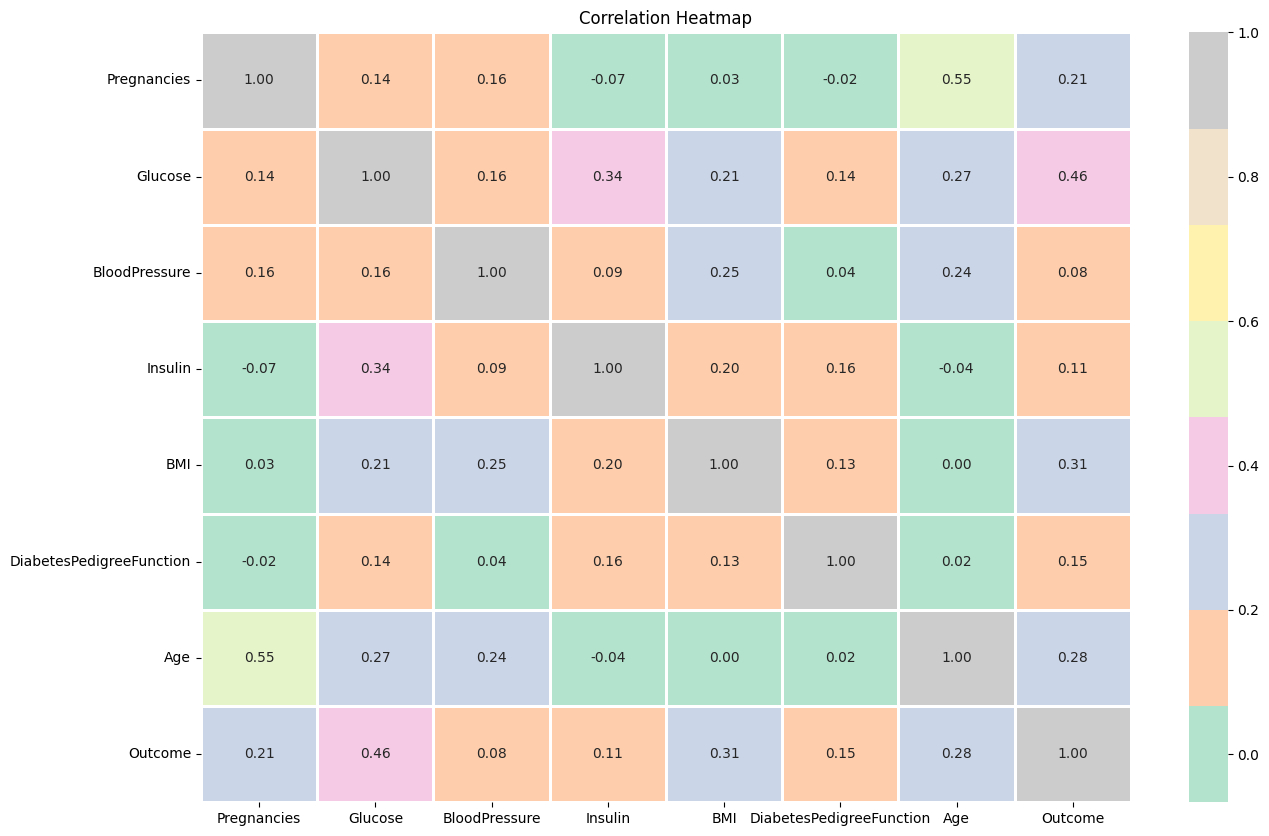

In [ ]:
# Esta parte corresponde a visualizar la correlación entre las variables.
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_data.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

Otra forma de visualizar la relación entre varias variables es por medio del gráfico parallel coordinates:

<Axes: >

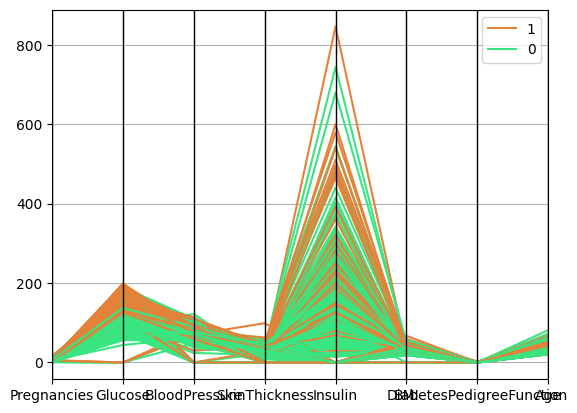

In [8]:
import pandas as pd

total_data = X
total_data["Name"] = y

pd.plotting.parallel_coordinates(total_data, "Name", color = ("#E58139", "#39E581", "#8139E5"))

En este gráfico podemos observar que solo para ciertas variables se realiza una clara diferenciación entre sus valores, en este caso,
esa diferenciación solo se alcanza a visualizar en las variables de "Pregnancies" y "Glocose".

Paso 2: Entrenaiento de Datos

In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state = 42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Ahora, se ejecuta el modelo y se visualiza en el siguiente gráfico.

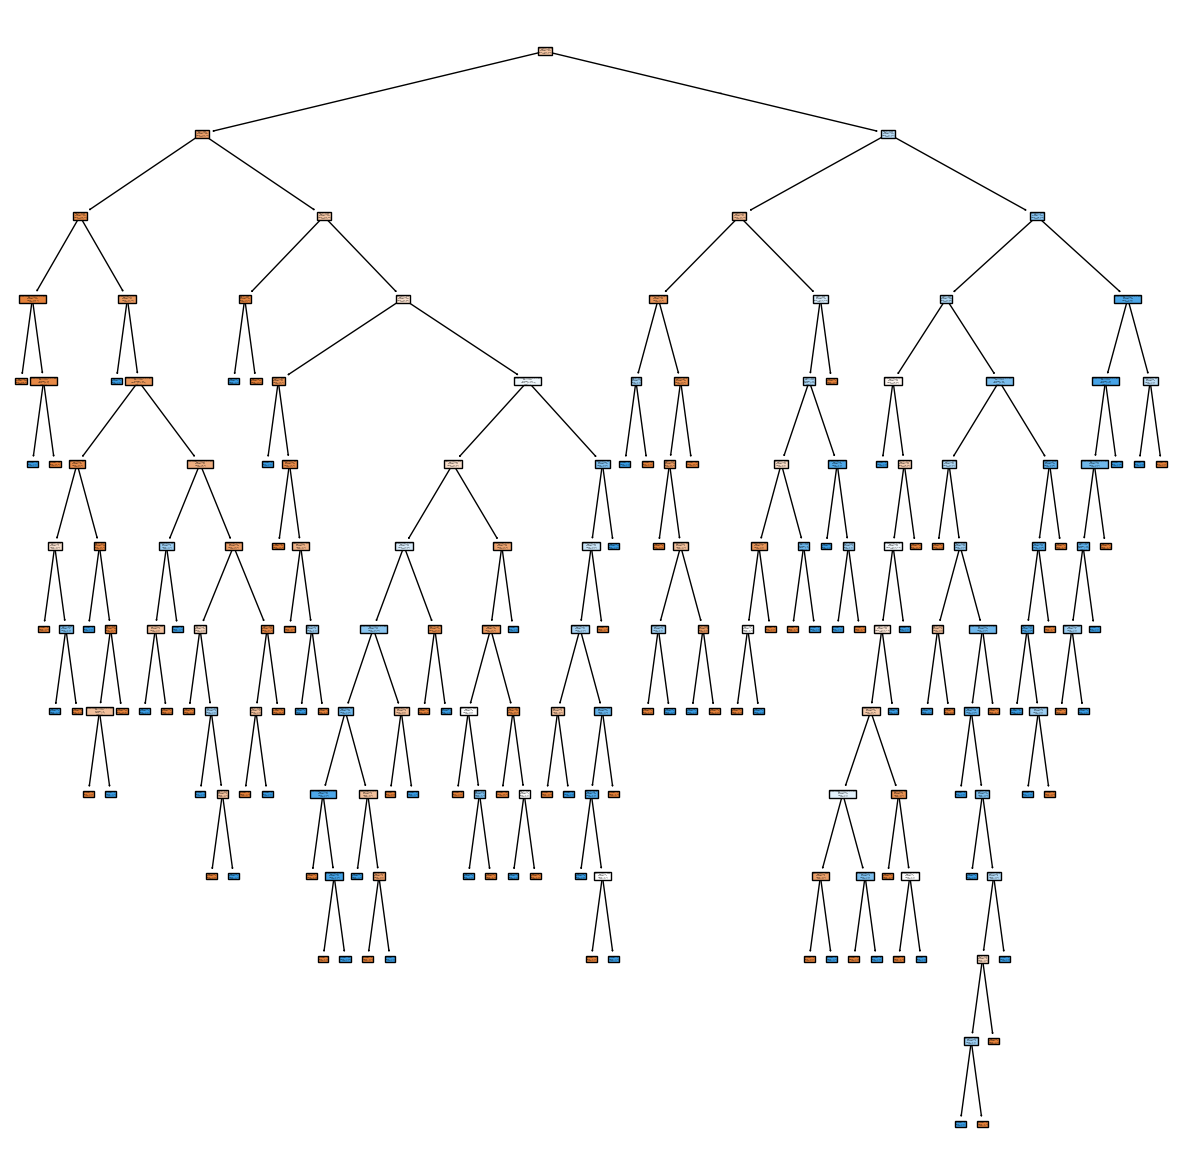

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(decision_tree_model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

Predicción del decision tree model

In [11]:
y_pred = decision_tree_model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [12]:
from sklearn.metrics import accuracy_score

accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt}")

Accuracy: 0.7467532467532467


In [13]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

Recall (Sensitivity): 0.7272727272727273


Ahora, se busca mejorar accuracy

Paso 4. Optimizar el modelo

### RandomizedSearchCV

In [16]:
# Con el fin de mejorar el modelo se usa la hiperparámetrización
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


#Espacio de búsqueda de cada hiper parámetro para XGBOOST

xg_rsv = {
        'max_depth': range(1, 10, 1),
        'min_samples_leaf': range(1, 20, 2),
        'min_samples_split': range(2, 20, 2),
        'criterion': ["entropy", "gini"]
    }

# Búsqueda por validación cruzada para XGBRegressor
xg_model = RandomizedSearchCV(DecisionTreeClassifier(),
                              param_distributions=xg_rsv,
                              scoring    = "accuracy",
                              n_iter=5,
                              cv=5,
                              n_jobs = -1,
                              verbose=True,
                              random_state=42)

xg_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 20, 2),
                                        'min_samples_split': range(2, 20, 2)},
                   random_state=42, scoring='accuracy', verbose=True)

In [17]:
xg_model.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_depth': 4,
 'criterion': 'gini'}

In [18]:
xgb_ideal_model = DecisionTreeClassifier(**xg_model.best_params_)
xgb_ideal_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=11, min_samples_split=4)

In [19]:
y_pred_rs = xgb_ideal_model.predict(X_test)
y_pred_rs

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [20]:
accurancy_dt = accuracy_score(y_test, y_pred_rs)
print("Accurancy:", accuracy_dt)

Accurancy: 0.7467532467532467


In [21]:
recall_dt = recall_score(y_test, y_pred_rs)
print("Recall (Sensitivity):", recall_dt)

Recall (Sensitivity): 0.6363636363636364


### GridSearchCV

In [22]:
# Importar libreria
from sklearn.model_selection import GridSearchCV

#Espacio de búsqueda de cada hiper parámetro para XGBOOST

xg_grid = {
        'max_depth': range(1, 10, 1),
        'min_samples_leaf': range(1, 20, 2),
        'min_samples_split': range(2, 20, 2),
        'criterion': ["entropy", "gini"]
    }

# Búsqueda por validación cruzada para XGBRegressor
xg_model_grid = GridSearchCV(DecisionTreeClassifier(),
                              param_grid=xg_grid,
                              scoring    = "accuracy",
                              cv=5,
                              n_jobs = -1,
                              verbose=True)

xg_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)},
             scoring='accuracy', verbose=True)

In [23]:
xg_model_grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 2}

In [24]:
xgb_ideal_model_g = DecisionTreeClassifier(**xg_model_grid.best_params_)
xgb_ideal_model_g.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15)

In [25]:
y_pred_gd_dt = xgb_ideal_model_g.predict(X_test)
y_pred_gd_dt

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [26]:
y_pred_train = xgb_ideal_model_g.predict(X_train)

In [27]:
accurancy_ds_dt = accuracy_score(y_test, y_pred_rs)
print("Accurancy:", accurancy_ds_dt)

Accurancy: 0.7012987012987013


In [28]:
recall_ds_dt = recall_score(y_test, y_pred_rs)
print("Recall (Sensitivity):", recall_ds_dt)

Recall (Sensitivity): 0.6363636363636364


### Interpretación:
Se puede observar que el modelo mejoró notablemente con RandomizedSearch más que con GridSearch.